In [1]:
import tensorflow as tf
import keras

import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


In [2]:
from keras.applications.inception_v3 import InceptionV3, decode_predictions
from keras import backend as k

In [3]:
iv3 = InceptionV3()

In [4]:
print(iv3.summary())

            
__________________________________________________________________________________________________
batch_normalization_64 (BatchNo (None, 17, 17, 192)  576         conv2d_64[0][0]                  
__________________________________________________________________________________________________
batch_normalization_69 (BatchNo (None, 17, 17, 192)  576         conv2d_69[0][0]                  
__________________________________________________________________________________________________
batch_normalization_70 (BatchNo (None, 17, 17, 192)  576         conv2d_70[0][0]                  
__________________________________________________________________________________________________
activation_61 (Activation)      (None, 17, 17, 192)  0           batch_normalization_61[0][0]     
__________________________________________________________________________________________________
activation_64 (Activation)      (None, 17, 17, 192)  0           batch_normalization_64[0][0]   

In [5]:
from keras.preprocessing import image

In [6]:
x = image.img_to_array(image.load_img("./images/beer.jpg", target_size=(299,299)))

#Cambio de rango, 0,255 -> -1, 1
x /= 255
x -= 0.5
x *= 2

print(x)

[[[-0.79607844 -0.8745098  -0.8666667 ]
  [-0.81960785 -0.8666667  -0.8509804 ]
  [-0.8509804  -0.85882354 -0.79607844]
  ...
  [ 0.28627455  0.27843142  0.32549024]
  [ 0.20784318  0.20000005  0.24705887]
  [ 0.1686275   0.11372554  0.17647064]]

 [[-0.79607844 -0.8745098  -0.8666667 ]
  [-0.81960785 -0.8666667  -0.8509804 ]
  [-0.8509804  -0.85882354 -0.79607844]
  ...
  [ 0.28627455  0.27843142  0.32549024]
  [ 0.20784318  0.20000005  0.24705887]
  [ 0.12941182  0.07450986  0.13725495]]

 [[-0.79607844 -0.8745098  -0.8666667 ]
  [-0.81960785 -0.8666667  -0.8509804 ]
  [-0.8509804  -0.85882354 -0.79607844]
  ...
  [ 0.28627455  0.27843142  0.32549024]
  [ 0.20784318  0.20000005  0.24705887]
  [ 0.10588241  0.05098045  0.11372554]]

 ...

 [[ 0.7019608   0.09019613 -0.7019608 ]
  [ 0.7254902   0.11372554 -0.6784314 ]
  [ 0.7176471   0.10588241 -0.6862745 ]
  ...
  [-0.12941176 -0.15294117 -0.99215686]
  [-0.05882353 -0.05882353 -0.9529412 ]
  [-0.01960784 -0.01960784 -0.9764706 ]]

 [

In [7]:
print(x.shape)

(299, 299, 3)


In [8]:
#Se agrega un identificador incremental para la imagen, como solo es una imagen, sera 1, esto es necesario xq tensorflow permite cargar multiples imagenes al mismo tiempo
x = x.reshape([1, x.shape[0], x.shape[1], x.shape[2]])

In [9]:
print(x.shape)

(1, 299, 299, 3)


In [10]:
y = iv3.predict(x)

In [11]:
y

array([[3.62692779e-04, 6.59718178e-04, 2.32775434e-04, 4.96044930e-04,
        2.78733001e-04, 1.61818592e-04, 1.70516112e-04, 1.91735075e-04,
        1.34117086e-04, 3.72826471e-04, 1.47683418e-03, 2.92780285e-04,
        5.43068280e-04, 4.97411354e-04, 3.20059247e-04, 4.51002212e-04,
        6.53194264e-04, 1.39593700e-04, 3.25149362e-04, 5.96413447e-04,
        2.31378886e-04, 3.90100002e-04, 1.54167516e-04, 2.12967760e-04,
        1.93632615e-04, 2.53524864e-04, 2.73623504e-04, 1.75927620e-04,
        1.76738933e-04, 1.69572872e-04, 4.50818567e-04, 2.58861983e-04,
        2.38263397e-04, 3.96211224e-04, 2.66243733e-04, 1.79555718e-04,
        9.94206290e-04, 1.80749863e-04, 2.45189265e-04, 3.22545209e-04,
        1.77188092e-04, 8.15992607e-05, 2.67129304e-04, 4.34474903e-04,
        1.64937883e-04, 2.43612842e-04, 1.97382964e-04, 7.20020675e-04,
        1.47692583e-04, 2.18936068e-04, 4.67150443e-04, 2.78831110e-04,
        1.94772743e-04, 8.10877318e-05, 5.80205524e-04, 1.437082

In [12]:
y.shape

(1, 1000)

In [13]:
decode_predictions(y)

[[('n03950228', 'pitcher', 0.1992893),
  ('n04131690', 'saltshaker', 0.1759387),
  ('n03063599', 'coffee_mug', 0.06143925),
  ('n02823750', 'beer_glass', 0.044008926),
  ('n04560804', 'water_jug', 0.034181222)]]

In [14]:
a = image.img_to_array(image.load_img("./images/gatito.jpg",target_size=(299,299)))

#Cambio de rango, 0,255 -> -1, 1
a /= 255
a -= 0.5
a *= 2

a = a.reshape([1, a.shape[0], a.shape[1], a.shape[2]])

b = iv3.predict(a)
decode_predictions(b)

[[('n02123045', 'tabby', 0.4174388),
  ('n04033995', 'quilt', 0.159316),
  ('n03958227', 'plastic_bag', 0.14278217),
  ('n02123159', 'tiger_cat', 0.09900617),
  ('n02124075', 'Egyptian_cat', 0.09247136)]]

## Ataques Adversarios

In [15]:
inp_layer = iv3.layers[0].input
out_layer = iv3.layers[-1].output
print(inp_layer)
print(out_layer)

Tensor("input_1:0", shape=(None, 299, 299, 3), dtype=float32)
Tensor("predictions/Softmax:0", shape=(None, 1000), dtype=float32)


In [16]:
#Clase Limon, queremos q la red neuronal detecte Limon
target_class = 951#Limon#388#PandaGigante
loss  = out_layer[0,target_class]

grad = k.gradients(loss,inp_layer)[0]

optimize_gradient = k.function([inp_layer, k.learning_phase()],[grad, loss])

In [17]:
adv = np.copy(a)
cost = 0.0
while cost < 0.95:
    gr, cost = optimize_gradient([adv, 0])
    adv += gr
    print("Lemon cost:", cost)

Lemon cost: 5.9376256e-05
Lemon cost: 5.964618e-05
Lemon cost: 5.99175e-05
Lemon cost: 6.0190414e-05
Lemon cost: 6.046388e-05
Lemon cost: 6.0740327e-05
Lemon cost: 6.10159e-05
Lemon cost: 6.129168e-05
Lemon cost: 6.156945e-05
Lemon cost: 6.1849496e-05
Lemon cost: 6.213012e-05
Lemon cost: 6.24123e-05
Lemon cost: 6.269719e-05
Lemon cost: 6.298438e-05
Lemon cost: 6.327421e-05
Lemon cost: 6.35681e-05
Lemon cost: 6.3864e-05
Lemon cost: 6.416243e-05
Lemon cost: 6.446298e-05
Lemon cost: 6.4765845e-05
Lemon cost: 6.5071574e-05
Lemon cost: 6.538143e-05
Lemon cost: 6.569394e-05
Lemon cost: 6.600691e-05
Lemon cost: 6.631944e-05
Lemon cost: 6.663649e-05
Lemon cost: 6.6957204e-05
Lemon cost: 6.727876e-05
Lemon cost: 6.760363e-05
Lemon cost: 6.7933106e-05
Lemon cost: 6.826389e-05
Lemon cost: 6.859632e-05
Lemon cost: 6.893212e-05
Lemon cost: 6.927202e-05
Lemon cost: 6.961422e-05
Lemon cost: 6.996086e-05
Lemon cost: 7.0309994e-05
Lemon cost: 7.065986e-05
Lemon cost: 7.1013244e-05
Lemon cost: 7.137404e

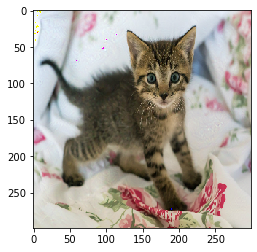

In [18]:
adv /= 2
adv += 0.5
adv *= 255
plt.imshow(adv[0].astype(np.uint8))
plt.show()

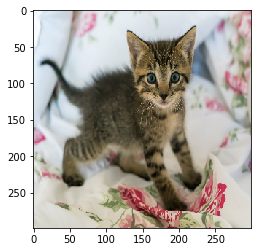

In [19]:
original = np.copy(a)

original /= 2
original += 0.5
original *= 255

plt.imshow(original[0].astype(np.uint8))
plt.show()

In [20]:
adv_2 = np.copy(a)

pert = 0.01

max_pert = a + pert
min_pert = a - pert

cost_2 = 0.0
while cost_2 < 0.95:
    gr_2, cost_2 = optimize_gradient([adv_2, 0])
    adv_2 += gr_2
    adv_2 = np.clip(adv_2, min_pert, max_pert)
    adv_2 = np.clip(adv_2,-1,1)
    print("Lemon cost:", cost_2)

Lemon cost: 5.9376256e-05
Lemon cost: 5.964617e-05
Lemon cost: 5.991753e-05
Lemon cost: 6.019029e-05
Lemon cost: 6.0463743e-05
Lemon cost: 6.0740218e-05
Lemon cost: 6.101564e-05
Lemon cost: 6.129162e-05
Lemon cost: 6.156915e-05
Lemon cost: 6.184937e-05
Lemon cost: 6.2130115e-05
Lemon cost: 6.2411964e-05
Lemon cost: 6.269648e-05
Lemon cost: 6.298389e-05
Lemon cost: 6.327355e-05
Lemon cost: 6.3567575e-05
Lemon cost: 6.3863474e-05
Lemon cost: 6.41619e-05
Lemon cost: 6.446221e-05
Lemon cost: 6.4765154e-05
Lemon cost: 6.5070606e-05
Lemon cost: 6.538054e-05
Lemon cost: 6.5693064e-05
Lemon cost: 6.6005865e-05
Lemon cost: 6.63184e-05
Lemon cost: 6.663523e-05
Lemon cost: 6.6956105e-05
Lemon cost: 6.727744e-05
Lemon cost: 6.7602006e-05
Lemon cost: 6.793155e-05
Lemon cost: 6.82622e-05
Lemon cost: 6.8594694e-05
Lemon cost: 6.8930494e-05
Lemon cost: 6.926981e-05
Lemon cost: 6.961221e-05
Lemon cost: 6.995868e-05
Lemon cost: 7.030776e-05
Lemon cost: 7.065755e-05
Lemon cost: 7.101082e-05
Lemon cost: 7

In [21]:
adv_2 /= 2
adv_2 += 0.5
adv_2 *= 255

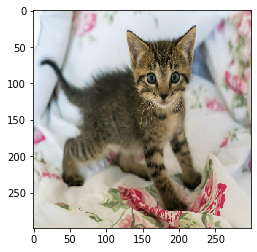

In [22]:
plt.imshow(adv_2[0].astype(np.uint8))
plt.show()

In [23]:
#Es extraño pero no reconoce Limon en este punto
decode_predictions(iv3.predict(adv))

[[('n03950228', 'pitcher', 1.0),
  ('n04131690', 'saltshaker', 4.4035767e-17),
  ('n01924916', 'flatworm', 2.9446805e-18),
  ('n06359193', 'web_site', 1.24677494e-26),
  ('n03388043', 'fountain', 7.265569e-30)]]

In [26]:
decode_predictions(iv3.predict(adv_2))

[[('n03950228', 'pitcher', 1.0),
  ('n04131690', 'saltshaker', 4.4035767e-17),
  ('n01924916', 'flatworm', 2.9446805e-18),
  ('n06359193', 'web_site', 1.24677494e-26),
  ('n03388043', 'fountain', 7.265569e-30)]]

In [27]:
from PIL import Image
im = Image.fromarray(adv_2[0].astype(np.uint8))
im.save("./images/Hacked.png")

In [28]:
#Pero si cuando se guarda y se vuelve a leer
Lemon = image.img_to_array(image.load_img("./images/Hacked.png",target_size=(299,299)))

#Cambio de rango, 0,255 -> -1, 1
Lemon /= 255
Lemon -= 0.5
Lemon *= 2

Lemon = Lemon.reshape([1, Lemon.shape[0], Lemon.shape[1], Lemon.shape[2]])

decode_predictions(iv3.predict(Lemon))

[[('n07749582', 'lemon', 0.99873036),
  ('n07747607', 'orange', 0.00047128),
  ('n07715103', 'cauliflower', 0.0001156268),
  ('n03443371', 'goblet', 8.184972e-05),
  ('n03950228', 'pitcher', 5.4623593e-05)]]